# Research on apartment listings

We have at our disposal the data of the Yandex Real Estate service — an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. We need to learn how to determine the market value of real estate. The main task is to set the parameters. This will allow us to build an automated system: it will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

## Step 1. Examining data from a file

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**According to the data documentation:**

* `airports_nearest` — distance to the nearest airport in meters (m)
* `balcony` — number of balconies
* `ceiling_height` — ceiling height (m)
* `cityCenters_nearest` — distance to the city center (m)
* `days_exposition` — how many days the ad was placed (from publication to removal)
* `first_day_exposition` — date of publication
* `floor` — floor
* `floors_total` — total floors in the house
* `is_apartment` — apartments (boolean type)
* `kitchen_area` — kitchen area in square meters (m²)
* `last_price` — price at the time of withdrawal from publication
* `living_area` — living area in square meters (m²)
* `locality_name` — name of the locality
* `open_plan` — free layout (boolean type)
* `parks_around3000` — the number of parks within a 3 km radius
* `parks_nearest` — distance to the nearest park (m)
* `ponds_around3000` — number of reservoirs within a radius of 3 km
* `ponds_nearest` — distance to the nearest reservoir (m)
* `rooms` — number of rooms
* `studio` — studio apartment (boolean type)
* `total_area` — the area of the apartment in square meters (m²)
* `total_images` — the number of photos of the apartment in the ad

### Conclusion

The data is a table consisting of 22 columns and 23,699 rows.

## Step 2. Data Preprocessing

### Define the missing values in each data column

In [5]:
columns = data.columns

In [6]:
for i in range(len(columns)):
    print(f'Number of non-zero values in column {columns[i]}: {data[columns[i]].isna().sum()}')

Number of non-zero values in column total_images: 0
Number of non-zero values in column last_price: 0
Number of non-zero values in column total_area: 0
Number of non-zero values in column first_day_exposition: 0
Number of non-zero values in column rooms: 0
Number of non-zero values in column ceiling_height: 9195
Number of non-zero values in column floors_total: 86
Number of non-zero values in column living_area: 1903
Number of non-zero values in column floor: 0
Number of non-zero values in column is_apartment: 20924
Number of non-zero values in column studio: 0
Number of non-zero values in column open_plan: 0
Number of non-zero values in column kitchen_area: 2278
Number of non-zero values in column balcony: 11519
Number of non-zero values in column locality_name: 49
Number of non-zero values in column airports_nearest: 5542
Number of non-zero values in column cityCenters_nearest: 5519
Number of non-zero values in column parks_around3000: 5518
Number of non-zero values in column parks_n

In [7]:
data['balcony'] = data['balcony'].fillna(0)

In [8]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [9]:
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64')

In [10]:
data['balcony'] = data['balcony'].astype('int')

The missing values in the `balcony` column only have been replaced, because replacing the missing values in other columns can greatly distort the data analysis results. The column type `is_apartment` was also changed to boolean, the column type `first_day_exposition` to datetime, and the column data type `balcony` to int for more convenient processing of this data.

### Calculations and adding results to the table

Let's calculate and add new characteristics to the table:

* price per square meter;
* day of the week, month and year of publication of the announcement;
* floor of the apartment; options - first, last, other;
* the ratio of living and total area, as well as the ratio of kitchen area to total.

In [11]:
# price per square meter
data['sq_meter_price'] = data['last_price'] / data['total_area']

In [12]:
# day of the week, month and year of publication of the announcement
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [13]:
# floor of the apartment; options - first, last, other
data['floor_grouped'] = 'other'
data['floor_grouped'] = data['floor_grouped'].where(data['floor'] != 1, 'first')
data['floor_grouped'] = data['floor_grouped'].where(data['floor'] != data['floors_total'], 'last')

In [14]:
# the ratio of living and total area, as well as the ratio of kitchen area to total
data['living\total'] = data['living_area']/data['total_area']
data['kitchen\total'] = data['kitchen_area']/data['total_area']

In [15]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_grouped,living\total,kitchen\total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,NaN,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,0.0,NaN,81.0,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,2.0,574.0,558.0,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,3.0,234.0,424.0,408176.100629,4,7,2015,other,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121.0,100000.000000,1,6,2018,other,0.320000,0.410000


### Research data analysis

Let's explore the following parameters:

* area
* price
* number of rooms
* ceiling height

Let's build histograms for each parameter

In [16]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

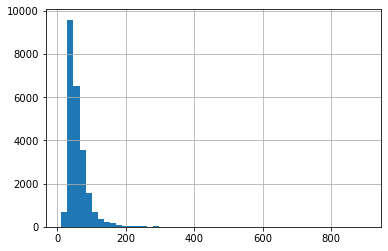

In [17]:
data['total_area'].hist(bins=50)

The distribution in the `total_area` column looks like normal. The histogram has a long tail. The average value is 60, the median value is 52. 

In [18]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

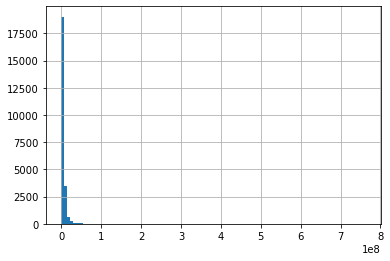

In [19]:
data['last_price'].hist(bins=100)

`last_price` has a large spread of data, as indicated by the difference between the mean and median value and the difference between the maximum and minimum value. The histogram has a long tail. The average value is 6.5 million, the median value is 4.6 million.

In [20]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

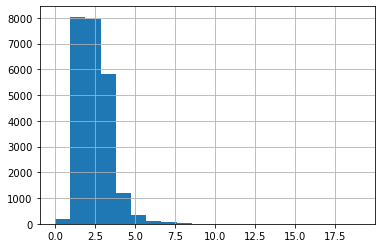

In [21]:
data['rooms'].hist(bins=20)

The distribution in the `rooms` column looks like normal. The histogram has a long tail. The average value is 2.07, the median value is 2. 

In [22]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

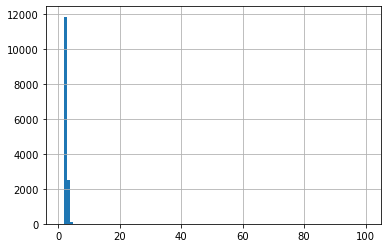

In [23]:
data['ceiling_height'].hist(bins=100)

`ceiling_height` has a long tail. The average value is 2.77, the median value is 2.65.

Next, we will explore the time of sale of the apartment:

In [24]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

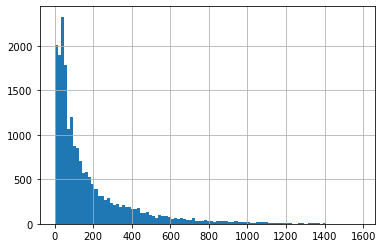

In [25]:
data['days_exposition'].hist(bins=100)

The difference between the mean and median values indicates that there are few values in the selection, but they greatly overestimate the average value. It would be more correct to estimate the **"normal"** time of sale - relying on the median value, which is 95 days. Very fast sales include ads that were removed in 45 days or less (25% quartile), very long ones include ads that were removed later than 232 days (75% quartile)

### Remove rare and confusing values

It can be seen that almost all rare values are in the "tail" of the histogram, approximately **after 800 days**.

In [26]:
data = data[data['days_exposition']<800]

In [27]:
data['days_exposition'].describe()

count    19924.000000
mean       155.848474
std        164.903461
min          1.000000
25%         44.000000
50%         91.000000
75%        212.000000
max        799.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

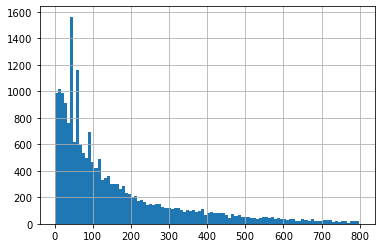

In [28]:
data['days_exposition'].hist(bins=100)

The difference between median and mean values - decreased.

count    19924.000000
mean         9.638577
std          5.663276
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

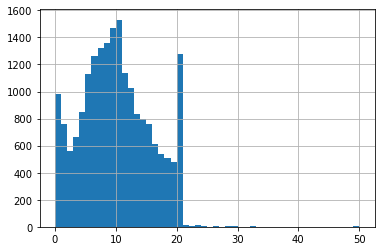

In [29]:
data['total_images'].hist(bins=50)
data['total_images'].describe()

It can be seen that rare values are >22. By removing these values, the difference between the median and average values decreased.

count    19861.000000
mean         9.581945
std          5.569156
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         21.000000
Name: total_images, dtype: float64

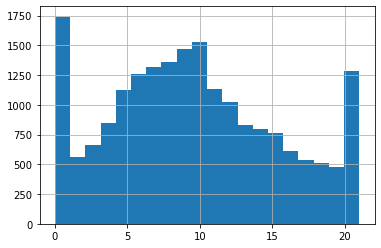

In [30]:
data = data[data['total_images']<22]
data['total_images'].hist(bins=20)
data['total_images'].describe()

count    19861.000000
mean        58.288386
std         33.311635
min         12.000000
25%         39.200000
50%         50.300000
75%         67.000000
max        900.000000
Name: total_area, dtype: float64

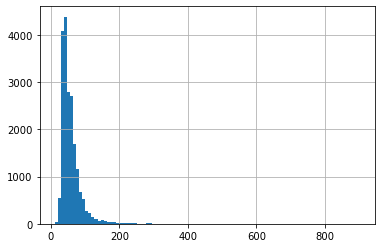

In [31]:
data['total_area'].hist(bins=100)
data['total_area'].describe()

It can be seen that rare values are >200. By removing these values, the difference between the median and average values decreased.

count    19702.000000
mean        56.457478
std         24.994221
min         12.000000
25%         39.025000
50%         50.000000
75%         66.500000
max        199.200000
Name: total_area, dtype: float64

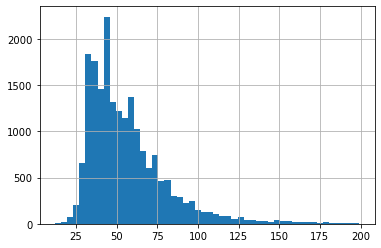

In [32]:
data = data[data['total_area']<200]
data['total_area'].hist(bins=50)
data['total_area'].describe()

count    19702.000000
mean         1.980357
std          0.967714
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

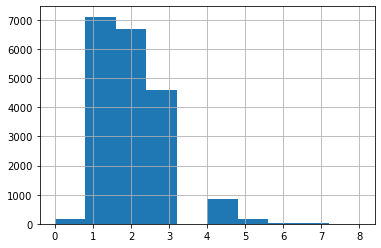

In [33]:
data['rooms'].hist(bins=10)
data['rooms'].describe()

count    11543.000000
mean         2.753373
std          1.287054
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

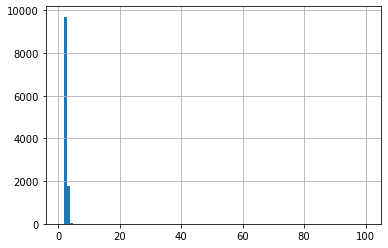

In [34]:
data['ceiling_height'].hist(bins=100)
data['ceiling_height'].describe()

It can be seen that rare values are >5. By removing these values, the difference between the median and average values will decrease.

count    11516.000000
mean         2.708352
std          0.250587
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          4.800000
Name: ceiling_height, dtype: float64

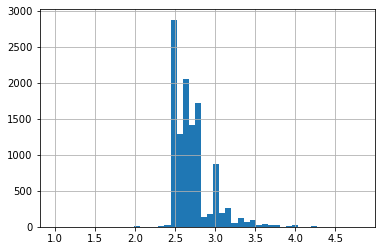

In [35]:
data = data[data['ceiling_height']<5]
data['ceiling_height'].hist(bins=50)
data['ceiling_height'].describe()

count    11511.000000
mean        10.381114
std          6.259110
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

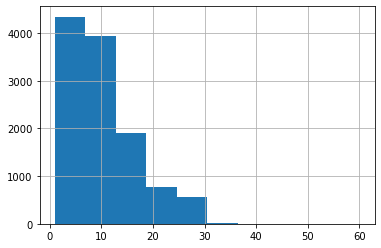

In [36]:
data['floors_total'].hist(bins=10)
data['floors_total'].describe()

It can be seen that rare values are >30. By removing these values, the difference between the median and average values will decrease.

count    11500.000000
mean        10.353826
std          6.194301
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         29.000000
Name: floors_total, dtype: float64

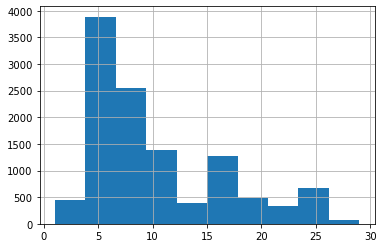

In [37]:
data = data[data['floors_total']<30]
data['floors_total'].hist(bins=10)
data['floors_total'].describe()

count    10841.000000
mean        33.173159
std         17.105297
min          2.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        150.800000
Name: living_area, dtype: float64

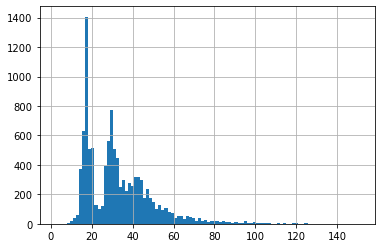

In [38]:
data['living_area'].hist(bins=100)
data['living_area'].describe()

It can be seen that rare values are >90. By removing these values, the difference between the median and average values will decrease.

count    10692.000000
mean        32.151231
std         14.770563
min          2.000000
25%         18.607500
50%         30.000000
75%         41.300000
max         89.600000
Name: living_area, dtype: float64

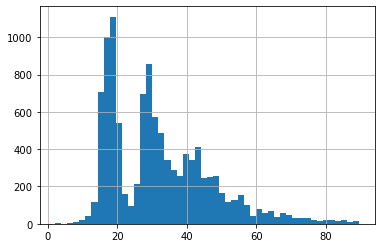

In [39]:
data = data[data['living_area']<90]
data['living_area'].hist(bins=50)
data['living_area'].describe()

count    10692.000000
mean         5.729704
std          4.657725
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

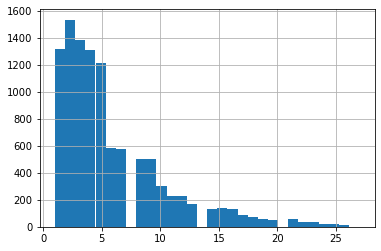

In [40]:
data['floor'].hist(bins=30)
data['floor'].describe()

count    10413.000000
mean        10.036545
std          5.069944
min          2.000000
25%          7.000000
50%          9.000000
75%         11.300000
max         93.200000
Name: kitchen_area, dtype: float64

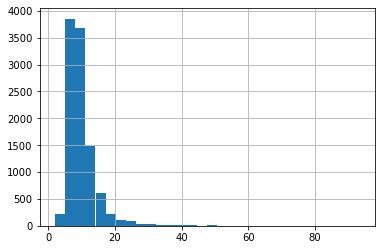

In [41]:
data['kitchen_area'].hist(bins=30)
data['kitchen_area'].describe()

It can be seen that rare values are >30. By removing these values, the difference between the median and average values will decrease.

count    10291.000000
mean         9.686839
std          3.774993
min          2.000000
25%          7.000000
50%          9.000000
75%         11.080000
max         29.900000
Name: kitchen_area, dtype: float64

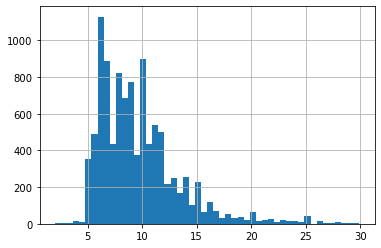

In [42]:
data = data[data['kitchen_area']<30]
data['kitchen_area'].hist(bins=50)
data['kitchen_area'].describe()

count    10291.000000
mean         0.709261
std          1.003207
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

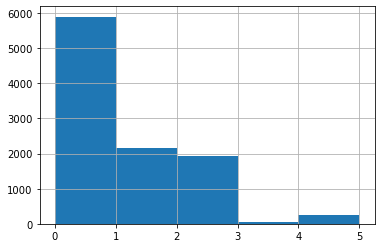

In [43]:
data['balcony'].hist(bins=5)
data['balcony'].describe()

count     8253.000000
mean     29025.135345
std      12925.066018
min          0.000000
25%      18079.000000
50%      27154.000000
75%      37434.000000
max      83758.000000
Name: airports_nearest, dtype: float64

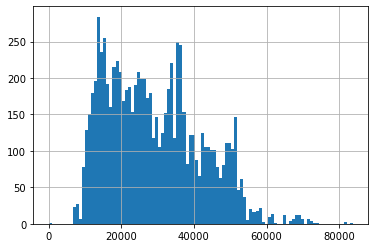

In [44]:
data['airports_nearest'].hist(bins=100)
data['airports_nearest'].describe()

It can be seen that rare values are >70000. By removing these values, the difference between the median and average values will decrease.

count     8237.000000
mean     28937.922059
std      12783.796754
min          0.000000
25%      18079.000000
50%      27122.000000
75%      37412.000000
max      69775.000000
Name: airports_nearest, dtype: float64

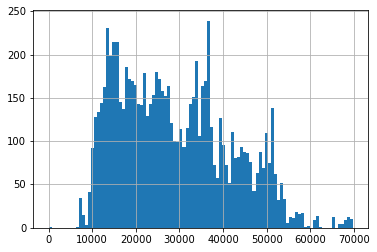

In [45]:
data = data[data['airports_nearest']<70000]
data['airports_nearest'].hist(bins=100)
data['airports_nearest'].describe()

count     8237.000000
mean     14512.236979
std       8434.910172
min        208.000000
25%      10124.000000
50%      13270.000000
75%      16176.000000
max      61495.000000
Name: cityCenters_nearest, dtype: float64

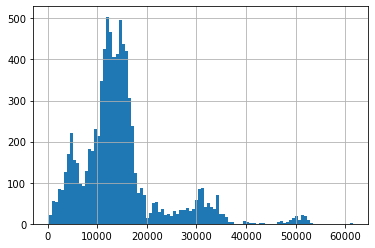

In [46]:
data['cityCenters_nearest'].hist(bins=100)
data['cityCenters_nearest'].describe()

It can be seen that rare values are >55000. By removing these values, the difference between the median and average values will decrease.

count     8236.000000
mean     14506.532419
std       8419.517098
min        208.000000
25%      10124.000000
50%      13270.000000
75%      16176.000000
max      53138.000000
Name: cityCenters_nearest, dtype: float64

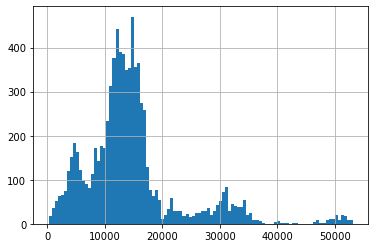

In [47]:
data = data[data['cityCenters_nearest']<55000]
data['cityCenters_nearest'].hist(bins=100)
data['cityCenters_nearest'].describe()

count    8236.000000
mean        0.597256
std         0.789818
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: parks_around3000, dtype: float64

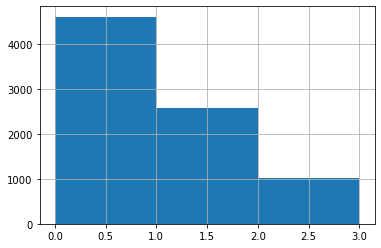

In [48]:
data['parks_around3000'].hist(bins=3)
data['parks_around3000'].describe()

count    3921.000000
mean      532.079827
std       277.896227
min        16.000000
25%       310.000000
50%       522.000000
75%       749.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

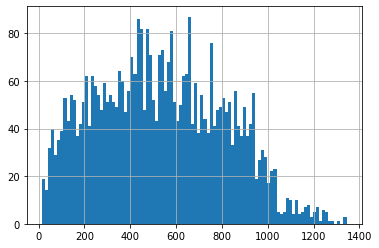

In [49]:
data['ponds_nearest'].hist(bins=100)
data['ponds_nearest'].describe()

count    8236.000000
mean      157.871540
std       166.445578
min         1.000000
25%        39.000000
50%        95.000000
75%       215.000000
max       799.000000
Name: days_exposition, dtype: float64

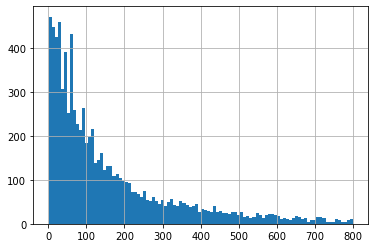

In [50]:
data['days_exposition'].hist(bins=100)
data['days_exposition'].describe()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8236 entries, 9 to 23693
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          8236 non-null   int64         
 1   last_price            8236 non-null   float64       
 2   total_area            8236 non-null   float64       
 3   first_day_exposition  8236 non-null   datetime64[ns]
 4   rooms                 8236 non-null   int64         
 5   ceiling_height        8236 non-null   float64       
 6   floors_total          8236 non-null   float64       
 7   living_area           8236 non-null   float64       
 8   floor                 8236 non-null   int64         
 9   is_apartment          8236 non-null   bool          
 10  studio                8236 non-null   bool          
 11  open_plan             8236 non-null   bool          
 12  kitchen_area          8236 non-null   float64       
 13  balcony          

### Determine the factors that most affect the cost of an apartment

In [52]:
data_price=data.loc[:,['last_price','total_area','rooms','cityCenters_nearest','floor','weekday','month','year']]
data_price.head()

,last_price,total_area,rooms,cityCenters_nearest,floor,weekday,month,year
9,5400000.0,61.0,3,15008.0,7,6,2,2017
10,5050000.0,39.6,1,13878.0,3,3,11,2017
13,3550000.0,42.8,2,33058.0,5,5,7,2017
16,6700000.0,82.0,3,10698.0,1,3,11,2017
18,3250000.0,31.0,1,10842.0,2,4,1,2017


In [53]:
data_price.corr()

,last_price,total_area,rooms,cityCenters_nearest,floor,weekday,month,year
last_price,1.000000,0.707520,0.420828,-0.300490,0.046465,-0.000589,0.012773,-0.057219
total_area,0.707520,1.000000,0.782068,-0.207730,-0.008998,-0.004601,0.000767,-0.129464
rooms,0.420828,0.782068,1.000000,-0.136854,-0.163628,0.000083,0.002579,-0.090176
cityCenters_nearest,-0.300490,-0.207730,-0.136854,1.000000,-0.011120,0.014232,-0.035614,0.016980
floor,0.046465,-0.008998,-0.163628,-0.011120,1.000000,0.011157,0.008000,0.006881
weekday,-0.000589,-0.004601,0.000083,0.014232,0.011157,1.000000,-0.019148,0.000957
month,0.012773,0.000767,0.002579,-0.035614,0.008000,-0.019148,1.000000,-0.227642
year,-0.057219,-0.129464,-0.090176,0.016980,0.006881,0.000957,-0.227642,1.000000


<AxesSubplot:>

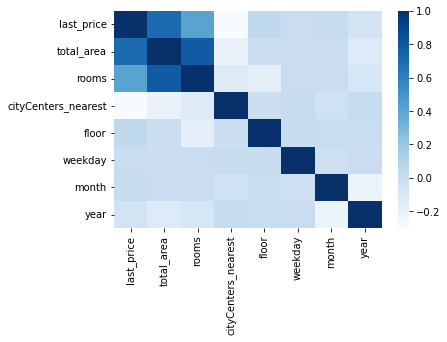

In [54]:
sns.heatmap(data_price.corr(), 
        xticklabels=data_price.corr().columns,
        yticklabels=data_price.corr().columns,
        cmap="Blues")

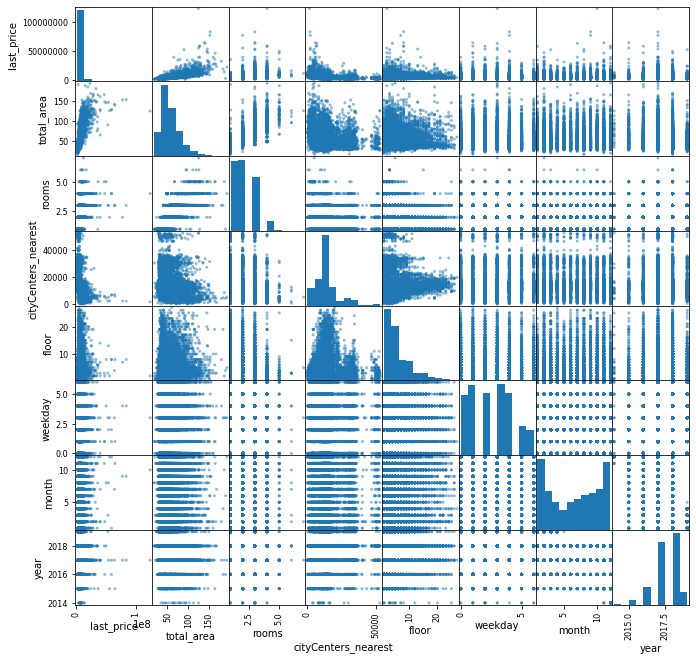

In [55]:
pd.plotting.scatter_matrix(data_price, figsize=(11, 11)) 
plt.show()

* There is a tendency - the larger the area, the higher the price (coefficient = 0.7).
* There is no strong correlation between the number of rooms and the price, we can say that in general the dependence is positive and with an increase in rooms, the price also increases, but in different ways.
* The relationship between the distance to the city center and the price is similar to exponential, with an increase in the distance to the city center, the price decreases (which is also indicated by a negative correlation coefficient), but after a certain point, an increase in the distance to the center does not significantly affect the price (the graph is flattened)

* The chart shows that the highest prices were on Thursday and Friday.
* The most expensive transaction was carried out in October, but the optimal months for sales are January-March, June-December - all the months off are approximately at the same level.
* The sales price has been increasing since 2014, reaches a peak in 2017, and after that it goes into decline.

<AxesSubplot:xlabel='floor_grouped'>

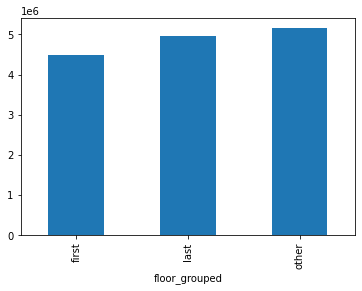

In [56]:
data.groupby('floor_grouped')['last_price'].median().plot(kind='bar')

It is logical that the first floor has the lowest cost, and the last floor has a cost lower than the "other" category

### Determine top 10 settlements with highest cost

Let's choose 10 settlements with the largest number of ads.

Next, we calculate the average price per square meter in these settlements.

Then we will allocate settlements with the highest and lowest housing costs.

In [57]:
data_locality = data.pivot_table(index='locality_name',values='sq_meter_price',aggfunc=['count','mean'])
data_locality.columns = ['count','mean']
data_locality.sort_values('count',ascending=False).head(10).sort_values('mean',ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,7106,109002.818824
Сестрорецк,97,102151.234594
Пушкин,162,101044.929024
посёлок Парголово,111,90007.850961
Петергоф,113,82809.502776
Кронштадт,51,79156.318293
посёлок Шушары,176,78506.109929
Колпино,166,74592.388682
Красное Село,86,72655.576598


**Conclusion:** the settlement with the highest cost - St. Petersburg (Санкт-Петербург), with the lowest - Lomonosov (Ломоносов)

### Determine the distance to the center

* Explore the offers of apartments: for each apartment there is information about the distance to the center.

* Select apartments in St. Petersburg (`locality_name`), find out which area is included in the center.

* Create a column with the distance to the center in kilometers: rounded up to integer values.

* After that, we will calculate the average price for each kilometer.

* Build a chart: it should show how the price depends on the distance from the center.

* Define the boundary where the chart changes greatly — this will be the central zone.

In [58]:
data_SP = data.query('locality_name == "Санкт-Петербург"')

In [59]:
data_SP['center_dist_km'] = round(data_SP['cityCenters_nearest']/1000)

<AxesSubplot:xlabel='center_dist_km'>

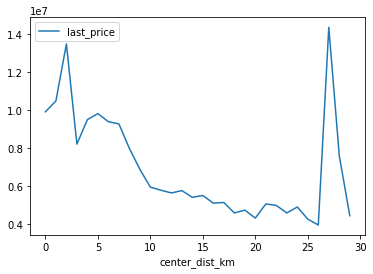

In [60]:
data_SP.pivot_table(index='center_dist_km',values='last_price').plot()

**Conclusion:** the tipping point comes at a point of 10 km. The central zone is within this value.

Select the segment of apartments in the center. Let's analyze this territory and explore the following parameters: area, price, number of rooms, ceiling height. We will also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the ad).

In [61]:
data_SP = data_SP.query('center_dist_km <= 9')
data_SP.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sq_meter_price,weekday,month,year,floor_grouped,living\total,kitchen\total,center_dist_km
63,2,20000000.0,118.0,2018-09-11,3,3.0,9.0,68.0,7,True,...,779.0,37.0,169491.525424,1,9,2018,other,0.576271,0.135593,5.0
85,13,5200000.0,46.3,2018-11-26,2,3.0,5.0,27.8,5,True,...,682.0,65.0,112311.015119,0,11,2018,last,0.600432,0.172786,9.0
94,3,3500000.0,29.5,2019-04-26,1,2.5,5.0,15.6,2,True,...,NaN,4.0,118644.067797,4,4,2019,other,0.528814,0.186441,7.0
106,9,10500000.0,124.1,2017-05-25,5,3.2,4.0,79.4,3,True,...,NaN,6.0,84609.186140,3,5,2017,other,0.639807,0.161160,6.0
118,8,4500000.0,31.0,2019-02-24,1,2.5,9.0,17.0,4,True,...,439.0,60.0,145161.290323,6,2,2019,other,0.548387,0.161290,9.0


In [62]:
data_price_SP=data_SP.loc[:,['last_price','total_area','rooms','cityCenters_nearest','floor','weekday','month','year','ceiling_height']]
data_price_SP.head()

,last_price,total_area,rooms,cityCenters_nearest,floor,weekday,month,year,ceiling_height
63,20000000.0,118.0,3,4800.0,7,1,9,2018,3.0
85,5200000.0,46.3,2,9319.0,5,0,11,2018,3.0
94,3500000.0,29.5,1,7303.0,2,4,4,2019,2.5
106,10500000.0,124.1,5,5527.0,3,3,5,2017,3.2
118,4500000.0,31.0,1,9089.0,4,6,2,2019,2.5


In [63]:
data_price_SP.corr()

,last_price,total_area,rooms,cityCenters_nearest,floor,weekday,month,year,ceiling_height
last_price,1.000000,0.628980,0.341247,-0.164271,0.118012,0.006475,0.025718,-0.081968,0.226094
total_area,0.628980,1.000000,0.762884,-0.252828,0.063270,-0.003030,0.003105,-0.149945,0.354927
rooms,0.341247,0.762884,1.000000,-0.222717,-0.090093,-0.014012,-0.000286,-0.102456,0.274451
cityCenters_nearest,-0.164271,-0.252828,-0.222717,1.000000,0.274086,0.029857,-0.013023,0.126591,-0.418789
floor,0.118012,0.063270,-0.090093,0.274086,1.000000,0.019368,-0.014008,0.013954,-0.200052
weekday,0.006475,-0.003030,-0.014012,0.029857,0.019368,1.000000,0.014158,0.005447,-0.002434
month,0.025718,0.003105,-0.000286,-0.013023,-0.014008,0.014158,1.000000,-0.202585,-0.001279
year,-0.081968,-0.149945,-0.102456,0.126591,0.013954,0.005447,-0.202585,1.000000,-0.130356
ceiling_height,0.226094,0.354927,0.274451,-0.418789,-0.200052,-0.002434,-0.001279,-0.130356,1.000000


<AxesSubplot:>

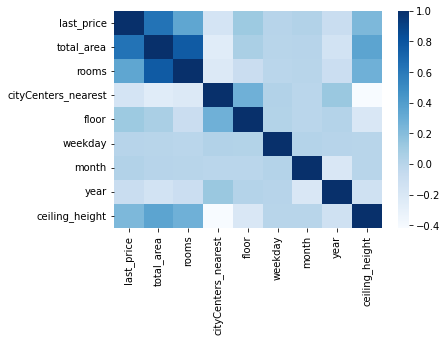

In [64]:
sns.heatmap(data_price_SP.corr(), 
        xticklabels=data_price_SP.corr().columns,
        yticklabels=data_price_SP.corr().columns,
        cmap="Blues")

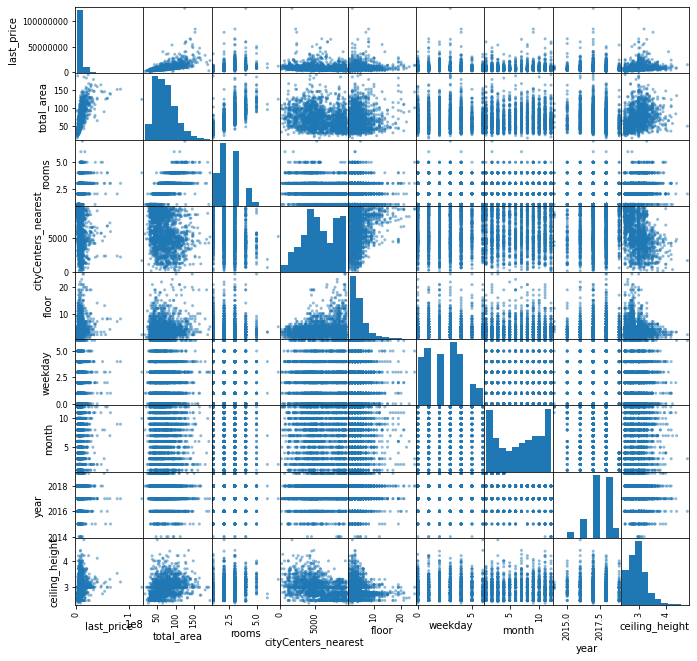

In [65]:
pd.plotting.scatter_matrix(data_price_SP, figsize=(11, 11)) 
plt.show()

* There is a tendency - the larger the area, the higher the price (coefficient = 0.63).
* There is no strong correlation between the number of rooms and the price, we can say that in general the dependence is positive and with an increase in rooms, the price also increases, but in different ways.
* The relationship between the distance to the city center is no longer exponential, but the trend continues with an increase in the distance to the city center - the price decreases (which is also indicated by a negative correlation coefficient)

* The chart shows that the highest prices were on Thursday and Friday.
* The most expensive transaction was carried out in October, but the optimal months for sales are January-March, June-December - all the months off are approximately at the same level.
* The sales price has been increasing since 2014, reaches a peak in 2017, and after that it goes into decline.

* It is also revealed that there is no specific relationship between the ceiling height and the price of the apartment

<AxesSubplot:xlabel='floor_grouped'>

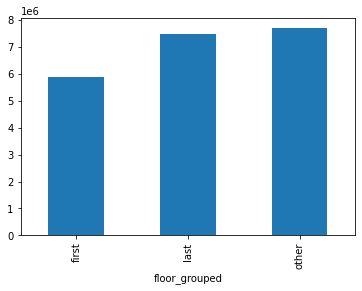

In [66]:
data_SP.groupby('floor_grouped')['last_price'].median().plot(kind='bar')

It is logical that the first floor has the lowest cost, and the last floor has a cost lower than the "other" category

**Conclusion:** everything remained similar to the analysis of a large sample, except for the dependence of the price on the distance to the center - it used to have an exponential form.

## General conclusion

The data of the Yandex Real Estate service were studied, gaps in the data were identified and eliminated. An analysis of the relationships of the market value of real estate with other factors was carried out, it was revealed that the **area of real estate** has the greatest impact.